In [4]:
# assignment3
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
from sklearn import mixture
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline
#data=pd.read_fwf('page-blocks.txt',header=None)
data = pd.read_csv("dia.csv", sep=",", header=None, index_col=False)
#data.describe(include='all')

X=data.iloc[:,0:19].values

Y=data.iloc[:,19].values

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from __future__ import print_function
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.3, random_state=0)
# rescale all the data

scalerMinMax = MinMaxScaler()
scalerStandard=StandardScaler()
scalerMinMax.fit(X_train)
scalerStandard.fit(X_train)
X_train_scaledMinMax=scalerMinMax.transform(X_train)
X_train_scaledStandard=scalerStandard.transform(X_train)
X_test_scaledMinMax=scalerMinMax.transform(X_test)
X_test_scaledStandard=scalerStandard.transform(X_test)
display(X.shape)
scalerStandard.fit(X)
X_scaled=scalerStandard.transform(X)
display(X_scaled.shape)
OrigX=X
X=X_scaled

(1151, 19)

(1151, 19)

Automatically created module for IPython interactive environment
best n_components by FactorAnalysis CV = 7


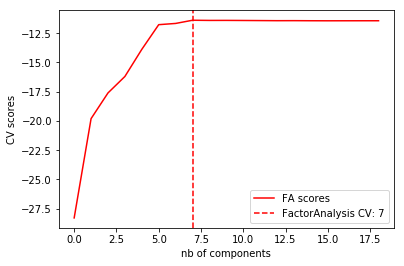

In [6]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.covariance import ShrunkCovariance, LedoitWolf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

print(__doc__)

# 
# #############################################################################
# Fit the models

n_components = np.arange(0, 19, 1)  # options for n_components

rank=10
def compute_scores(X):
    pca = PCA(svd_solver='full')
    fa = FactorAnalysis()

    pca_scores, fa_scores = [], []
    for n in n_components:
        pca.n_components = n
        fa.n_components = n
        pca_scores.append(np.mean(cross_val_score(pca, X)))
        fa_scores.append(np.mean(cross_val_score(fa, X)))

    return pca_scores, fa_scores

 
def shrunk_cov_score(X):
    shrinkages = np.logspace(-2, 0, 30)
    cv = GridSearchCV(ShrunkCovariance(), {'shrinkage': shrinkages})
    return np.mean(cross_val_score(cv.fit(X).best_estimator_, X))


def lw_score(X):
    return np.mean(cross_val_score(LedoitWolf(), X))

 
pca_scores, fa_scores = compute_scores(X)
n_components_pca = n_components[np.argmax(pca_scores)]
n_components_fa = n_components[np.argmax(fa_scores)]

pca = PCA(svd_solver='full', n_components='mle')
pca.fit(X)
#n_components_pca_mle = pca.n_components_

#print("best n_components by PCA CV = %d" % n_components_pca)
print("best n_components by FactorAnalysis CV = %d" % n_components_fa)
#print("best n_components by PCA MLE = %d" % n_components_pca_mle)

plt.figure()
#plt.plot(n_components, pca_scores, 'b', label='PCA scores')
plt.plot(n_components, fa_scores, 'r', label='FA scores')
#plt.axvline(rank, color='g', label='TRUTH: %d' % rank, linestyle='-')
#plt.axvline(n_components_pca, color='b',label='PCA CV: %d' % n_components_pca, linestyle='--')
plt.axvline(n_components_fa, color='r',
                label='FactorAnalysis CV: %d' % n_components_fa,
                linestyle='--')
#plt.axvline(n_components_pca_mle, color='k',label='PCA MLE: %d' % n_components_pca_mle, linestyle='--')

    # compare with other covariance estimators
#plt.axhline(shrunk_cov_score(X), color='violet',label='Shrunk Covariance MLE', linestyle='-.')
#plt.axhline(lw_score(X), color='orange',label='LedoitWolf MLE' % n_components_pca_mle, linestyle='-.')

plt.xlabel('nb of components')
plt.ylabel('CV scores')
plt.legend(loc='lower right')


plt.show()

In [7]:
fa=FactorAnalysis(n_components=7, random_state=2)
X_FA=fa.fit_transform(X)

[0.2036944442208701,
 0.22950027632972708,
 0.2433146456109542,
 0.2608107016556486,
 0.2688137720868438,
 0.27230058433132964,
 0.2720349650143914,
 0.27332309955420786,
 0.27933960281898573,
 0.2811534731281853,
 0.2424237442009185,
 0.23840578152341396,
 0.21922475716293915,
 0.2209971624254247,
 0.21768823091508788,
 0.2175859428485135,
 0.21682189672606794,
 0.20150992193787187]

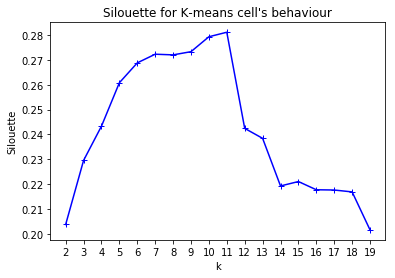

(1151,)

In [18]:
from sklearn.metrics import silhouette_score
s = []
for n_components in range(2,20):
    clusterer = KMeans(n_clusters=n_components,random_state=12,init='k-means++')
    clusterer.fit(X_FA)
    labels = clusterer.predict(X_FA)
    s.append(silhouette_score(X_FA, labels, metric='euclidean'))
display(s)
plt.plot(range(2,20),s,'-b+')
plt.ylabel("Silouette")
plt.xlabel("k")
plt.xticks(range(2,20))
plt.title("Silouette for K-means cell's behaviour")
plt.show()
display(Y.shape)

Automatically created module for IPython interactive environment
12.25


array([22202.91065853, 18152.38495105, 16636.54806556, 16342.15248352,
       15666.8260349 , 14556.60020355, 14333.94619732, 14881.10481279,
       14502.17430985, 14157.44528805, 13620.49800964, 13821.68460801,
       13868.40935635, 13481.70067342, 13474.17780797, 13712.52969828,
       13340.86837787, 13756.37037723, 13216.89124962, 22331.0667621 ,
       22102.15660653, 21003.01756641, 19941.13274182, 19966.61348431,
       18965.12698498, 18792.45846932, 18009.00580956, 17636.70514492,
       17967.89532313, 17475.53774634, 17407.06756683, 17111.18373026,
       16502.90377835, 17013.71725496, 15743.34679119, 16094.26858575,
       15426.064403  , 16355.45435312, 22183.05064904, 16188.14520156,
       14916.78267902, 13473.71727697, 12695.59943038, 12612.78343593,
       12313.37263759, 12351.56520794, 11554.74371324, 11687.14457183,
       11595.75907345, 11670.20923445, 11482.09092367, 11362.679774  ,
       11458.17476535, 11459.70522132, 11598.52965754, 11422.03651847,
      

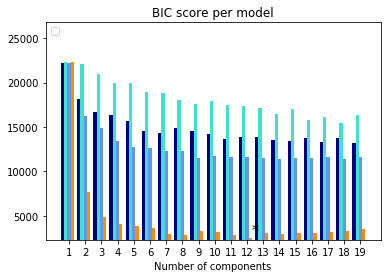

In [22]:
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

print(__doc__)

# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0., -0.1], [1.7, .4]])
lowest_bic = np.infty
bic = []
n_components_range = range(1, 20)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X_FA)
        bic.append(gmm.bic(X_FA))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
spl = plt.subplot()
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()*1.2])
#plt.ylim(-40000,80000)

plt.legend( loc=2)
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
plt.xlabel('Number of components')
#spl.legend([b[0] for b in bars], cv_types, bbox_to_anchor=(0., 1.02, 1., .102), loc=9,ncol=4, mode="expand", borderaxespad=0.)
#spl.legend([b[0] for b in bars], cv_types,ncol=2)
plt.title('BIC score per model')
print(xpos)
# Plot the winner
display(bic)

Homogeneity for 11 cluster: 0.066 
mutual index for 11 cluster: 0.032 
completnenss for 11 cluster: 0.034 


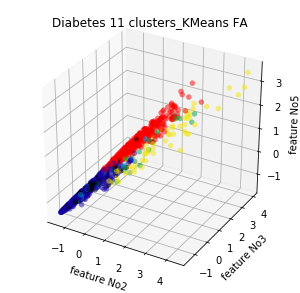

In [8]:
clusterer = KMeans(n_clusters=7,random_state=11,init='k-means++')
clusterer.fit(X_FA)
cluster_labels = clusterer.predict(X_FA)
colors = cm.spectral(cluster_labels.astype(float) /7)
fig = plt.figure(figsize=(5, 5))
ax1=fig.add_subplot(111,projection='3d') 
ax1.scatter(X[:, 2], X[:, 3],X[:,5], s=30,lw=0, alpha=0.5,
                c=colors, edgecolor='K');
ax1.set_xlabel('feature No2 ')
ax1.set_ylabel('feature No3')
ax1.set_zlabel('feature No5')
ax1.set_title('Diabetes 11 clusters_KMeans FA')
print("Homogeneity for 11 cluster: %0.3f " % metrics.homogeneity_score(Y, cluster_labels))
print("mutual index for 11 cluster: %0.3f " % metrics.adjusted_mutual_info_score(Y, cluster_labels))
print("completnenss for 11 cluster: %0.3f " % metrics.completeness_score(Y, cluster_labels))

Homogeneity for 12 cluster: 0.066 
mutual index for 12 cluster: 0.032 
completnenss for 12 cluster: 0.034 


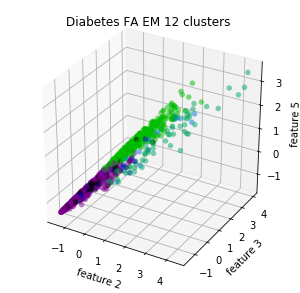

In [28]:
fig = plt.figure(figsize=(5, 5))
ax2=fig.add_subplot(111,projection='3d')
gmm = mixture.GaussianMixture(n_components=12, covariance_type='full',random_state=0)
gmm.fit(X_FA)
cluster_labels = clusterer.predict(X_FA)
colors = cm.spectral(cluster_labels.astype(float) /12)

ax2.scatter(X[:, 2], X[:, 3],X[:,5],s=30, lw=0, alpha=0.5,
                c=colors, edgecolor='k')  

 
ax2.set_xlabel('feature 2 ')
ax2.set_ylabel('feature 3')
ax2.set_zlabel('feature 5')
ax2.set_title('Diabetes FA EM 12 clusters ')
 
print("Homogeneity for 12 cluster: %0.3f " % metrics.homogeneity_score(Y, cluster_labels))
print("mutual index for 12 cluster: %0.3f " % metrics.adjusted_mutual_info_score(Y, cluster_labels))
print("completnenss for 12 cluster: %0.3f " % metrics.completeness_score(Y, cluster_labels))

In [1]:
#


In [2]:
#

In [3]:
#